In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Importing Loans data.csv
df = pd.read_csv('Height_Weight.csv')

In [3]:
df.head()

,id,gender,weight,height
0,29,F,39,157
1,182,F,43,154
2,130,F,44,157
3,104,F,45,163
4,128,F,45,157


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      199 non-null    int64 
 1   gender  199 non-null    object
 2   weight  199 non-null    int64 
 3   height  199 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.3+ KB


In [5]:
# Let's look at some statistical information about our dataframe.
df.describe(include='int64') 

,id,weight,height
count,199.000000,199.000000,199.000000
mean,100.944724,65.195980,170.587940
std,57.681571,13.008031,8.948848
min,1.000000,39.000000,148.000000
25%,51.500000,55.000000,164.000000
50%,101.000000,63.000000,170.000000
75%,150.500000,73.500000,177.500000
max,200.000000,103.000000,197.000000


In [6]:
df.describe(include='object')

,gender
count,199
unique,2
top,F
freq,111


In [7]:
df.drop(['id'], axis = 1,inplace=True)
df

,gender,weight,height
0,F,39,157
1,F,43,154
2,F,44,157
3,F,45,163
4,F,45,157
...,...,...,...
194,M,97,189
195,M,101,183
196,M,102,185
197,M,103,185


In [8]:
df.isnull().sum()

gender    0
weight    0
height    0
dtype: int64

## Univariate Analysis

In [9]:
df['gender'].value_counts()

F    111
M     88
Name: gender, dtype: int64

<AxesSubplot:xlabel='gender', ylabel='count'>

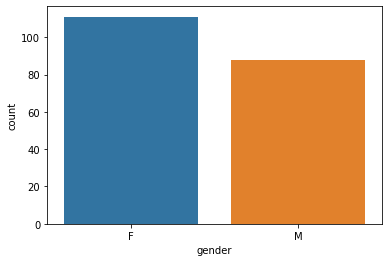

In [10]:
sns.countplot(x = 'gender' , data = df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='weight', ylabel='height'>

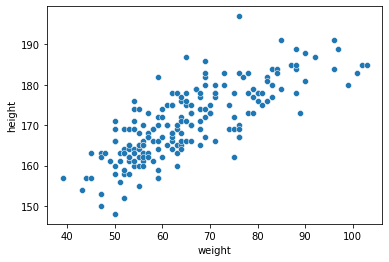

In [11]:
sns.scatterplot(df.weight,df.height)

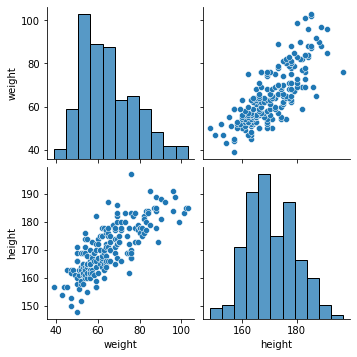

In [12]:
sns.pairplot(df)

In [13]:
df.corr()

,weight,height
weight,1.000000,0.782438
height,0.782438,1.000000


<AxesSubplot:>

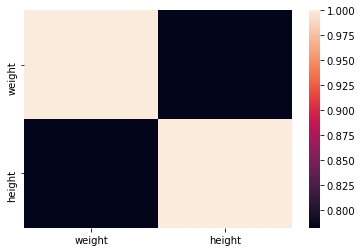

In [14]:
sns.heatmap(df.corr())

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='weight', ylabel='Density'>

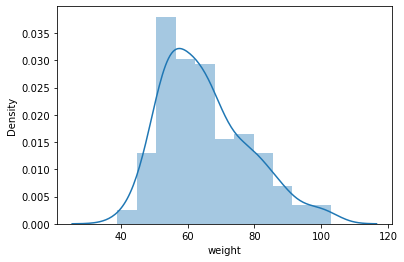

In [15]:
sns.distplot(df.weight)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='height', ylabel='Density'>

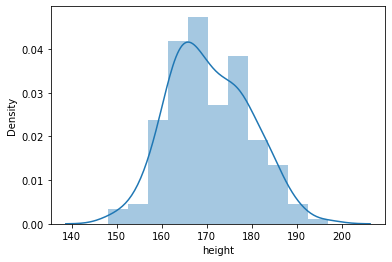

In [16]:
sns.distplot(df.height)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='weight', ylabel='Density'>

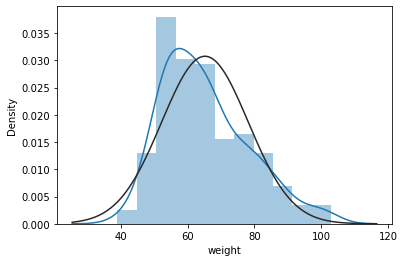

In [17]:
#Fit --> Fitting Distribution to Data from scipy library
from scipy.stats import norm
sns.distplot(df.weight,fit=norm) 

In [18]:
df['weight'].skew() #Moderately Skewed

0.7449402052268245

In [19]:
df['height'].skew() #Almost Symmetric

0.2129090698591845

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='height'>

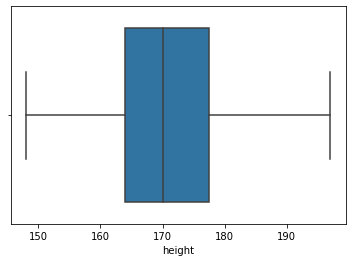

In [20]:
#For Outlier Detection
sns.boxplot(df.height)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='weight'>

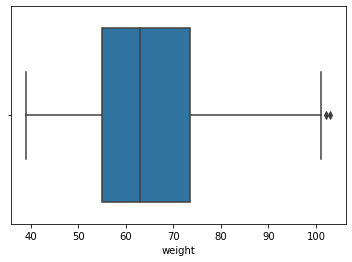

In [21]:
#For Outlier Detection
sns.boxplot(df.weight)

### Plotting Best Fit Line Using np.polyfit

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='weight', ylabel='height'>

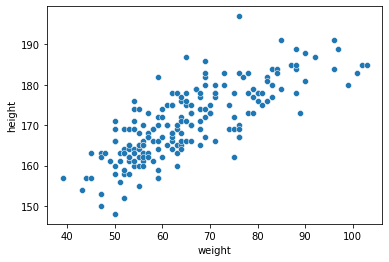

In [22]:
plot=sns.scatterplot(df.weight,df.height)
plot

In [23]:
X=df['height']
X

0      157
1      154
2      157
3      163
4      157
      ... 
194    189
195    183
196    185
197    185
198    180
Name: height, Length: 199, dtype: int64

In [24]:
y=df['weight']
y

0       39
1       43
2       44
3       45
4       45
      ... 
194     97
195    101
196    102
197    103
198     99
Name: weight, Length: 199, dtype: int64

Call numpy.polyfit(x, y, deg) with x and y as arrays of data for the scatter plot and deg as 1 to calculate the slope and y-intercept of the line of best fit. Plot the linear regression line by calling matplotlib.pyplot.plot(x, eq) with x as the array of x-values and eq as the y-intercept added to the product of the slope and x.

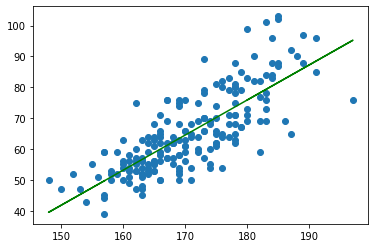

In [25]:
#USE numpy.polyfit() TO PLOT A LINEAR REGRESSION LINE ON A SCATTER PLOT
import numpy as np
plt.scatter(X, y)
m, b = np.polyfit(X, y, 1) #m = slope, b=intercept
plt.plot(X, m*X + b,'g') #We plot x & equation (m*X+b)

### Creation of dummy variables

In [26]:
df.select_dtypes(include=[np.number]).columns.tolist()

['weight', 'height']

In [27]:
df_num = df[['weight','height']]
df_num.head()

,weight,height
0,39,157
1,43,154
2,44,157
3,45,163
4,45,157


In [28]:
#Create a list of categorical variables
df.select_dtypes(include=['object']).columns.tolist()

['gender']

In [29]:
df_dummies = pd.get_dummies(df['gender'])

In [34]:
df_dummies

,F,M
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
194,0,1
195,0,1
196,0,1
197,0,1


In [35]:
#Combined column wise, appending of columns
df_combined = pd.concat([df_num, df_dummies], axis=1)

In [36]:
df_combined.head()

,weight,height,F,M
0,39,157,1,0
1,43,154,1,0
2,44,157,1,0
3,45,163,1,0
4,45,157,1,0


In [37]:
#Find Missing Values
df_combined.isnull().sum(axis = 0)

weight    0
height    0
F         0
M         0
dtype: int64

In [38]:
# Putting feature variable to X (ie X = Dataset after removing Interest Rate)
X = df_combined.drop('weight', axis= 1)

# Putting response variable to y
y = df_combined['weight']

In [39]:
X

,height,F,M
0,157,1,0
1,154,1,0
2,157,1,0
3,163,1,0
4,157,1,0
...,...,...,...
194,189,0,1
195,183,0,1
196,185,0,1
197,185,0,1


In [40]:
y

0       39
1       43
2       44
3       45
4       45
      ... 
194     97
195    101
196    102
197    103
198     99
Name: weight, Length: 199, dtype: int64

Splitting the data in Training and Test set
Using sklearn we split 70% of our data into training set and rest in test set.
Setting random_state will give the same training and test set everytime on running the code.

In [41]:
#Split the Data 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 , random_state=100)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((139, 3), (139,), (60, 3), (60,))

### Performing Linear Regression

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
# Representing LinearRegression as lm
lm = LinearRegression()
lm

LinearRegression()

In [44]:
# fit the model to the training data
lm.fit(X_train,y_train)

LinearRegression()

### Step 5 : Model Evaluation

In [45]:
# print the intercept
print(lm.intercept_)

-62.123003002009604


In [46]:
# Let's see the coefficient
coeff_df = pd.DataFrame(lm.coef_,X_test.columns,columns=['Coefficient'])
coeff_df

,Coefficient
height,0.747111
F,-4.532026
M,4.532026


In [47]:
# Making predictions using the model
y_pred = lm.predict(X_test)
print(y_pred)

[59.60670945 73.90053672 52.88271157 58.85959857 70.16498234 76.14186935
 75.39475847 55.87115507 54.37693332 57.36537682 79.13031285 76.14186935
 76.14186935 70.91209322 74.6476476  79.13031285 85.10719986 79.87742373
 79.13031285 55.87115507 57.36537682 78.38320198 59.60670945 68.67076059
 59.60670945 66.33070733 75.39475847 63.34226383 82.11875636 76.14186935
 61.84804208 58.1124877  73.15342585 78.38320198 75.39475847 61.84804208
 54.37693332 73.15342585 68.67076059 60.35382033 74.6476476  57.36537682
 58.1124877  82.86586723 54.37693332 49.14715719 50.64137894 53.62982244
 59.60670945 83.61297811 64.83648558 54.37693332 73.90053672 54.37693332
 52.88271157 48.40004631 74.6476476  62.59515295 75.39475847 79.13031285]


In [49]:
#Model Performance Metrics
#Coefficient of Determination (R square)

from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
r_squared


0.577972096683651

In [50]:
from math import sqrt
rmse = sqrt(mse)
print('Mean_Squared_Error :' ,mse)
print('Root_Mean_Squared_Error :' ,rmse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 76.41096541478045
Root_Mean_Squared_Error : 8.741336592008137
r_square_value : 0.577972096683651


In [51]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1

,Actual,Predicted
126,68,59.606709
104,64,73.900537
99,63,52.882712
92,62,58.859599
111,65,70.164982
166,79,76.141869
116,65,75.394758
96,62,55.871155
52,55,54.376933
69,58,57.365377


### Statmodels & p value

In [52]:
import statsmodels.api as sm
X_train_sm = X_train # X_train is assigned to X_train_sm 
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
X_train_sm = sm.add_constant(X_train_sm)
# create a fitted model in one line
lm_1 = sm.OLS(y_train,X_train_sm).fit()

# print the coefficients
lm_1.params

const    -41.415335
height     0.747111
F        -25.239693
M        -16.175642
dtype: float64

In [53]:
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                 weight   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     144.2
Date:                Mon, 02 Aug 2021   Prob (F-statistic):           2.49e-34
Time:                        12:13:21   Log-Likelihood:                -469.85
No. Observations:                 139   AIC:                             945.7
Df Residuals:                     136   BIC:                             954.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -41.4153     11.415     -3.628      0.0